## Fermi- Dirac Function

https://kitchingroup.cheme.cmu.edu/blog/2013/03/06/Integrating-the-Fermi-distribution-to-compute-entropy/

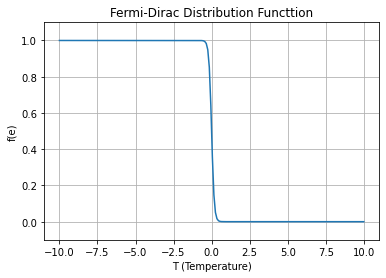

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
k = 8.6e-5
T = 1000

def f(e):
    return 1.0 / (np.exp((e - mu)/(k*T)) + 1)

espan = np.linspace(-10, 10, 200)
plt.plot(espan, f(espan))
plt.ylim([-0.1, 1.1])
plt.savefig('fermi-entropy-integrand-1.png')
plt.title("Fermi-Dirac Distribution Functtion")
plt.xlabel("T (Temperature)")
plt.ylabel("f(e)")
plt.grid()

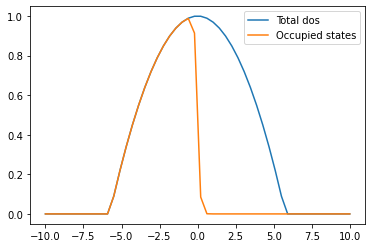

In [3]:
mu = 0
k = 8.6e-5
T = 1000

def f(e):
    return 1.0 / (np.exp((e - mu)/(k*T)) + 1)

def dos(e):
    d = (np.ones(e.shape) - 0.03 * e**2) 
    return d * (d > 0)
espan = np.linspace(-10, 10)

plt.plot(espan, dos(espan), label='Total dos')
plt.plot(espan, f(espan) * dos(espan), label='Occupied states')
plt.legend(loc='best')
plt.savefig('fermi-entropy-integrand-2.png')

nan
[            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
 -9.75109643e-14 -1.05987106e-10 -1.04640574e-07 -8.76265644e-05
 -4.92684641e-02 -2.91047740e-01 -7.75652579e-04 -1.00962241e-06
 -1.06972936e-09 -1.00527877e-12 -8.36436686e-16 -6.48930917e-19
 -4.37946336e-22 -2.23285389e-25 -1.88578082e-29  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
0.20888608089717214


/tmp/ipykernel_7223/1729097296.py:16: RuntimeWarning: divide by zero encountered in log
  g = n * (f * np.log(f) + (1 - f) * np.log(1 - f))
/tmp/ipykernel_7223/1729097296.py:16: RuntimeWarning: invalid value encountered in multiply
  g = n * (f * np.log(f) + (1 - f) * np.log(1 - f))


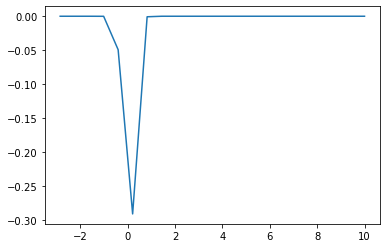

In [7]:
mu = 0
k = 8.6e-5
T = 1000

def fermi(e):
    return 1.0 / (np.exp((e - mu)/(k*T)) + 1)

def dos(e):
    d = (np.ones(e.shape) - 0.03 * e**2) 
    return d * (d > 0)

espan = np.linspace(-20, 10)
f = fermi(espan)
n = dos(espan)

g = n * (f * np.log(f) + (1 - f) * np.log(1 - f))

print(np.trapz(espan, g)) # nan because of the nan in the g vector
print(g)

plt.plot(espan, g)
plt.savefig('fermi-entropy-integrand-3.png')

# find the elements that are not nan
ind = np.logical_not(np.isnan(g))

# evaluate the integrand for only those points
print(np.trapz(espan[ind], g[ind]))